Epoch 1/50
235/235 [==============================] - 4s 11ms/step - loss: 0.2410 - val_loss: 0.1646
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1498 - val_loss: 0.1368
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1322 - val_loss: 0.1254
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1236 - val_loss: 0.1184
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1170 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1121 - val_loss: 0.1087
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1087 - val_loss: 0.1058
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1064 - val_loss: 0.1039
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1042 - val_loss: 0.1017
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1022 - val_los

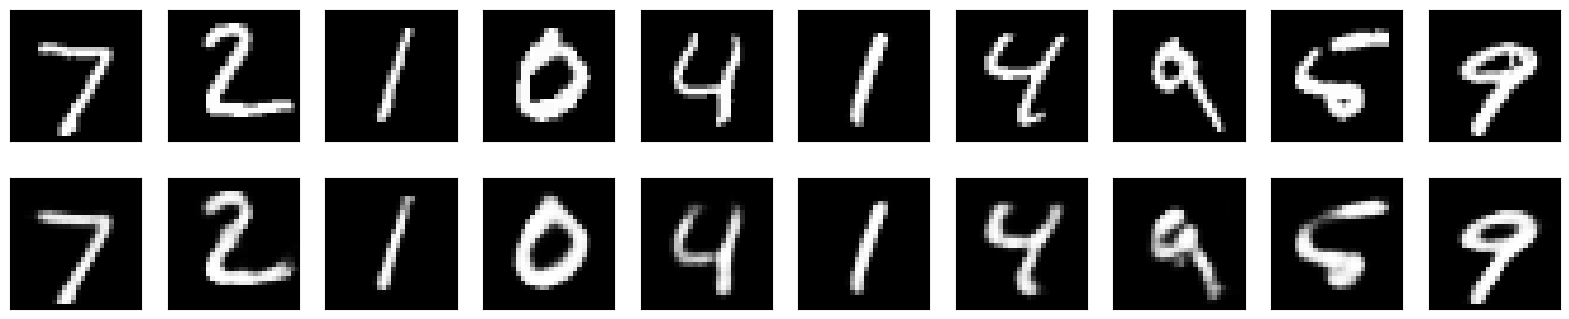

In [1]:
# apply autoencoder on mnist data set
# Import necessary libraries
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
# split the data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the architecture of the autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # connect layers
encoded = Dense(64, activation='relu')(encoded)  # connect layers
encoded = Dense(32, activation='relu')(encoded)  # connect layers

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)
# Create decoder model
decoder = Model(autoencoder.layers[3].input, autoencoder.layers[-1].output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,
                shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decode_images=decoder.predict(encoded_imgs)

# Plot the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Certainly! An autoencoder is a type of artificial neural network that is trained to
#  learn efficient representations of data, typically for the purpose of dimensionality reduction or feature learning. It consists of an encoder and a decoder, and the architecture is designed to map the input data to a lower-dimensional representation and then reconstruct the original input from this representation.

# Here's a breakdown of the components and the process of an autoencoder in Keras:

# Encoder:

# The encoder is the first part of the autoencoder. It takes the input data and transforms it into a compressed or encoded representation.
# In Keras, the encoder is typically composed of Dense layers (fully connected layers) with activation functions like ReLU.
# The final layer of the encoder produces the compressed representation, also known as the latent space.
# Decoder:

# The decoder takes the compressed representation produced by the encoder and reconstructs the original input data.
# Similar to the encoder, the decoder is composed of Dense layers, often with activation functions like ReLU.
# The final layer of the decoder typically uses an activation function appropriate for the input data format (e.g., sigmoid for image data normalized between 0 and 1).
# Loss Function:

# The loss function is crucial in training an autoencoder. It measures the difference between the input and the reconstructed output.
# For binary data (e.g., pixel values between 0 and 1 in images), binary cross-entropy is a common choice. For real-valued data, mean squared error can be used.
# Training:

# The autoencoder is trained to minimize the chosen loss function. During training, the input data is fed into the network, and the weights are adjusted to minimize the difference between the input and the reconstructed output.
# The backpropagation algorithm is used to update the weights based on the gradient of the loss with respect to the weights.
# Latent Space:

# The compressed representation produced by the encoder is referred to as the latent space. This representation ideally captures the most important features of the input data in a lower-dimensional form.
# Applications:

# Autoencoders have various applications, such as dimensionality reduction, feature learning, data denoising, and anomaly detection.